# Advanced Lane Finding



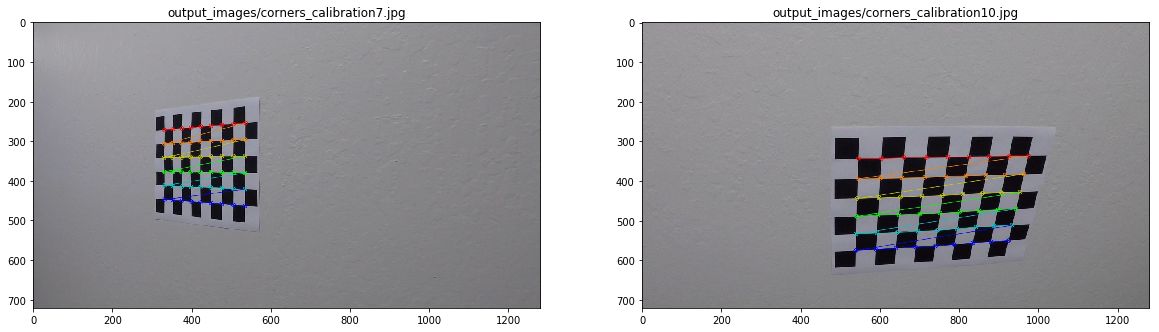

In [21]:
import camera
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# computes the calibration of images in 'camera_cal', see camera.py for implementation
ret,mtx,dist,rvecs,tvecs = camera.calibrate('camera_cal', 9, 6, save=True)

# store camera calibration data to file - for later use
camera.store('camera_calibration_data.p', ret, mtx, dist, rvecs, tvecs)

# plot corner finding images, 'save=True'
corner_findings_files = glob.glob('output_images/corners_*.jpg')

# plot two of the corner finding result images 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

img01 = mpimg.imread(corner_findings_files[0])
ax1.set_title(corner_findings_files[0])
ax1.imshow(img01)

img02 = mpimg.imread(corner_findings_files[1])
ax2.set_title(corner_findings_files[1])
ax2.imshow(img02)

In [5]:
from pipeline import lane_detector
import tools as tls
import cv2, os
import numpy as np

test = lane_detector('camera_calibration_data.p')  

test_files = tls.files_in_dir('test_images', True)

test.debug_binary = True
test.debug_histogram = True
test.debug_warped = True
test.debug_lines = True
test.debug_detect = True



out = 'output_images/test_images'
test.out = out

for file in test_files:
    # split filename from path, ...
    file_only = tls.filename_from_path(file)
    base, ext = tls.filename_split(file_only)
    
    # tell lane_detector which file is being processed
    test.base = base
    
    # read next file in list
    image = cv2.imread(file)
    
    # process and detect lane in image
    result = test.process(image)
    
    # save lane detection result
    tls.save_image_as(result, '{}_result{}'.format(base,ext), tls.path_join(out, 'result'))

In [1]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [2]:
from pipeline import lane_detector
import tools as tls
detector = lane_detector('camera_calibration_data.p')        

def process_image(image):

    # convert video to BGR, process video and convert to RGB
    return tls.bgr2rgb(detector.process(tls.rgb2bgr(image)))
    #return detector.process(image)

In [3]:
white_output = 'output_videos/project_video.mp4'

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video output_videos/project_video.mp4.
Moviepy - Writing video output_videos/project_video.mp4



Moviepy - Done !
Moviepy - video ready output_videos/project_video.mp4
CPU times: user 4min 40s, sys: 18.2 s, total: 4min 58s
Wall time: 1min 23s


In [4]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [5]:
challenge_output = 'output_videos/challenge_video.mp4'

clip3 = VideoFileClip('challenge_video.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   1%|          | 3/485 [00:00<00:19, 24.21it/s, now=None]

Moviepy - Building video output_videos/challenge_video.mp4.
Moviepy - Writing video output_videos/challenge_video.mp4



Moviepy - Done !
Moviepy - video ready output_videos/challenge_video.mp4
CPU times: user 1min 46s, sys: 7.43 s, total: 1min 53s
Wall time: 31.2 s


In [6]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))